In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [76]:
phase = [0, 45, 90, 135, 180, 225, 270, 315]
PSDz_l = []
for i in phase:
    filename = 'D:\\Experiment\\Cooling\\231109\\y phase\\'+str(i)+'.mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['A'])[0]
    for i in range(20):
        PSDz = scisig.welch(z[i*1*int(1/Tint):(i+1)*1*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDz_l.append(PSDz[1])
freq = PSDz[0]

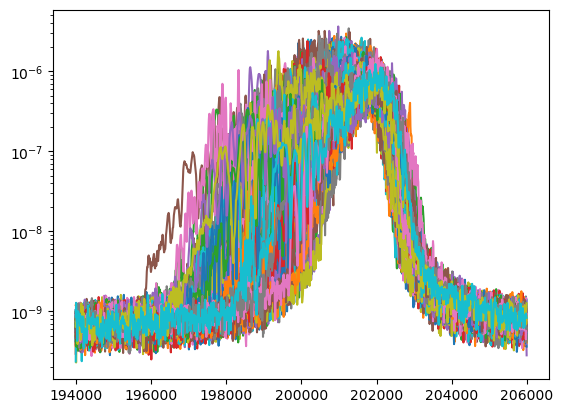

In [77]:
lb = 19400
ub = 20600
for i in PSDz_l:
    plt.plot(freq[lb:ub], i[lb:ub])

plt.yscale('log')

<ErrorbarContainer object of 3 artists>

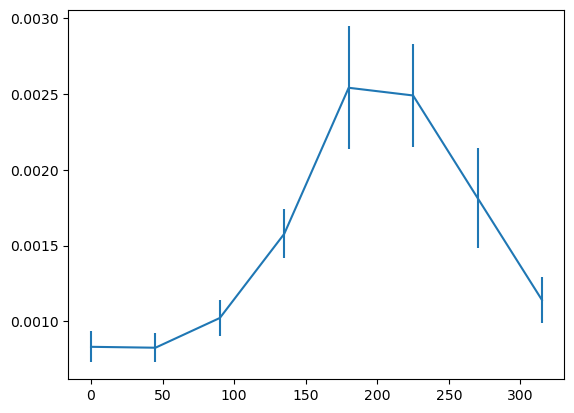

In [78]:
maxll = []
errll = []
for i in range(len(phase)):
    maxl = []
    for i in PSDz_l[i*20:(i+1)*20]:
        max = np.trapz(i[lb:ub], freq[lb:ub])
        maxl.append(max)
    maxll.append(np.mean(maxl))
    errll.append(np.std(maxl))

plt.errorbar(phase, maxll, yerr = errll)

In [41]:
PSDz_l = []
for i in [0, 60, 120]:
    filename = 'D:\\Experiment\\Cooling\\231109\\z amp\\'+str(i)+'.mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['B'])[0]
    for i in range(20):
        PSDz = scisig.welch(z[i*1*int(1/Tint):(i+1)*1*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDz_l.append(PSDz[1])
freq = PSDz[0]

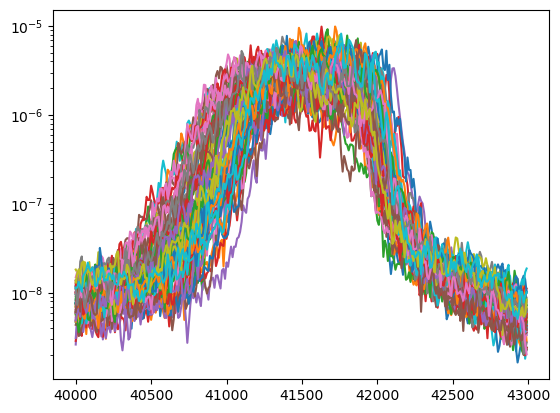

In [42]:
lb = 4000
ub = 4300
for i in PSDz_l:
    plt.plot(freq[lb:ub], i[lb:ub])

plt.yscale('log')

<ErrorbarContainer object of 3 artists>

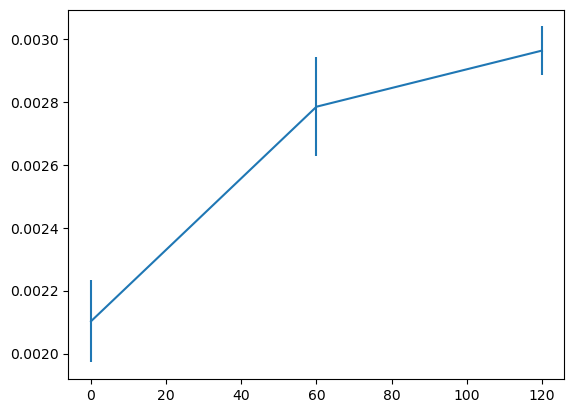

In [43]:
maxll = []
errll = []
for i in range(3):
    maxl = []
    for i in PSDz_l[i*20:(i+1)*20]:
        max = np.trapz(i[lb:ub], freq[lb:ub])
        maxl.append(max)
    maxll.append(np.mean(maxl))
    errll.append(np.std(maxl)/np.sqrt(20))

phase = [0, 60, 120]
plt.errorbar(phase, maxll, yerr = errll)